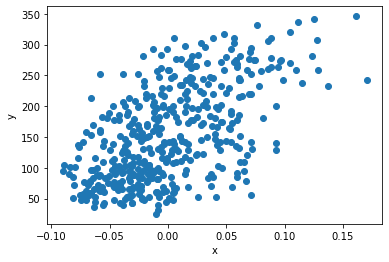

In [3]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
import matplotlib.pyplot as plt

# print(diabetes)
# print(type(diabetes))

# print(diabetes.data_filename)

# print(diabetes.data.shape)
# print(diabetes.target.shape)

## 2번째 bmi값
x = diabetes.data[:, 2]

# print(x)
# print(x.shape)
y = diabetes.target

plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.8.0


In [16]:
print(type(diabetes))

# Change to ndarray 

dataset_dia = diabetes.data
print(type(dataset_dia))


#diabetes.data returns dataframe if "as_frame=True" option is set for the load_diabetes

diabetes = load_diabetes(as_frame=True)
df_dia = diabetes.data
print(type(dataset_dia))



<class 'sklearn.utils.Bunch'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [17]:
df_dia.tail()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930
441,-0.045472,-0.044642,-0.073030,-0.081414,0.083740,0.027809,0.173816,-0.039493,-0.004220,0.003064


In [6]:
#isna() # 값이 NA이면 True, 아니면 False
df_dia.isna().sum()

age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

In [7]:
# test sample, train sample 분할
train_diabetes = df_dia.sample(frac=0.8,random_state=0)
test_diabetes = df_dia.drop(train_diabetes.index)

print(train_diabetes.shape)
print(test_diabetes.shape)


(354, 10)
(88, 10)


In [32]:
train_stats = train_diabetes.describe()
train_stats.pop("bmi")
train_stats = train_stats.transpose()


"""
특성의 스케일과 범위가 다르면 정규화(normalization)하는 것이 권장됩니다. 
특성을 정규화하지 않아도 모델이 수렴할 수 있지만, 훈련시키기 어렵고 입력 단위에 의존적인 모델이 만들어집니다.


노트: 의도적으로 훈련 세트만 사용하여 통계치를 생성했습니다. 
이 통계는 테스트 세트를 정규화할 때에도 사용됩니다. 
이는 테스트 세트를 모델이 훈련에 사용했던 것과 동일한 분포로 투영하기 위해서입니다.
"""

def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_diabetes = norm(train_diabetes)
normed_test_diabetes = norm(test_diabetes)


print(normed_train_diabetes.shape)
print(normed_test_diabetes.shape)

print(train_stats)
print(train_stats.shape)


print(normed_train_diabetes)

(354, 10)
(88, 10)
     count      mean       std       min       25%       50%       75%  \
age  354.0 -0.000702  0.047152 -0.107226 -0.037299  0.005383  0.037168   
sex  354.0 -0.001289  0.047533 -0.044642 -0.044642 -0.044642  0.050680   
bp   354.0 -0.000234  0.047266 -0.112400 -0.036656 -0.005671  0.035644   
s1   354.0 -0.000663  0.047865 -0.126781 -0.034592 -0.004321  0.026982   
s2   354.0 -0.000124  0.048652 -0.115613 -0.031141 -0.007420  0.030940   
s3   354.0  0.000919  0.048366 -0.098625 -0.032356 -0.006584  0.026550   
s4   354.0 -0.001514  0.046538 -0.076395 -0.039493 -0.002592  0.034309   
s5   354.0 -0.001851  0.046333 -0.126097 -0.033249 -0.004683  0.031036   
s6   354.0  0.001379  0.046179 -0.129483 -0.030072 -0.001078  0.027917   

          max  
age  0.110727  
sex  0.050680  
bp   0.132044  
s1   0.153914  
s2   0.198788  
s3   0.181179  
s4   0.185234  
s5   0.133599  
s6   0.135612  
(9, 8)
          age  bmi        bp        s1        s2        s3        s4  \
3

In [21]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_diabetes.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [22]:
model = build_model()


In [24]:
model.summary()
print(len(train_diabetes.keys()))
#dense Param 704 = [345,10]  (None, 64)  -> 10 * 64 + 64 
#dense Param 4160 = [64,]  (None, 64)  -> 64* 64 + 64 
#dense Param 65 = [64,]  (None, 1)  -> 64 * 1 + 1 


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                704       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4,929
Trainable params: 4,929
Non-trainable params: 0
_________________________________________________________________
10


In [26]:
example_batch = normed_train_diabetes[:10]

print(example_batch)
example_result = model.predict(example_batch)
example_result

          age       sex       bmi        bp        s1        s2        s3  \
362  0.437207  1.093330  2.163730  1.487475 -0.737578 -0.545821 -0.535750   
249 -0.256144 -0.912053  1.238385  1.123271  1.015947  0.606313 -0.383508   
271  0.822402  1.093330  0.155053  0.904749 -0.881310 -0.429964 -0.840234   
435 -0.256144 -0.912053 -0.522029 -0.843431 -0.335130  0.097829 -0.383508   
400 -0.487261 -0.912053  0.922413  1.924520 -0.363876 -0.726043  1.443397   
403 -0.410222 -0.912053  2.005744 -0.115023 -0.105160 -0.487892 -0.459629   
12   0.360168 -0.912053 -0.634876 -0.187863 -0.076413 -0.198250  0.910550   
399  1.284636  1.093330  0.448455  1.050430  0.354781  0.245869 -0.307387   
198 -1.103572 -0.912053  1.102968 -0.552067 -1.140027 -0.693860 -0.307387   
205 -0.641339 -0.912053  0.944982  0.322022 -0.335130 -0.964193 -0.002903   

           s4        s5        s6  
362 -0.023161  0.120068  0.843758  
249  0.769770  1.555327  0.126184  
271 -0.023161 -0.351089  0.126184  
435 -0.0

array([[-0.22214207],
       [-0.66904783],
       [-0.09791973],
       [ 0.01999967],
       [ 0.15317416],
       [-0.35415292],
       [-0.05514781],
       [-0.27888796],
       [ 0.25033063],
       [-0.14032474]], dtype=float32)